# 가중치 감쇠 (weight decay)

앞 절에서 우리는 오버피팅(overfitting)에 대해서 알아봤고, 이를 해결하기 위해서 용량 제어(capacity control)의 필요성에 대해서도 이야기했습니다. 학습 데이터셋의 양을 늘리는 것은 오버피팅(overfitting) 문제를 해결할 수도 있지만, 학습 데이터를 추가로 확보하는 것은 일반적으로 어려운 일입니다. 그렇기 때문에, 사용하는 함수의 복잡도를 조정하는 것을 더 선호합니다. 구체적으로는 차수를 조정해서 다항식의 복잡도를 조절할 수 있는 것을 확인했습니다. 이 방법은 일차원 데이터를 다루는 문제에 대해서는 좋은 전략이 될 수 있지만, 이 방법은 쉽게 복잡해지기 때문에 관리가 어려워질 수 있고, 너무 투박한 방법입니다. 예를 들면, $D$ 차원 벡터의 경우, $d$  차수에 대한 단항의 개수는  ${D -1 + d} \choose {D-1}$ 가 됩니다. 따라서, 여러 함수에 대한 제어를 하는 것보다는 함수의 복잡도를 조절할 수 있는 보다 정교한 툴이 필요합니다.

## 제곱 놈 정규화(squared norm regularization)

가장 많이 사용하는 기법 중에 하나로 가중치 감쇠(weight decay)가 있습니다. 이 방법은 모든 함수 $f​$ 들 중에서 $f=0​$ 이 가장 간단한 형태라는 것에 착안하고 있습니다. 따라서, 0과 얼마나 가까운가를 이용해서 함수에 대한 측정을 할 수 있습니다. 이를 측정하는 방법은 다양한데 별도의 수학 분야가 존재하기까지 합니다. 예를 들면, 이 문제에 대한 답을 찾는 것에 목적을 두고 있는 함수 분석과 Banach 공간 이론 (the theory of Banach spaces)를 들 수 있습니다.

우리의 목적을 위해서는 아주 간단한 것을 사용해도 충분합니다:

선형 함수 $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}​$  에서 가중치 벡터(weight vector)가 작을 경우 ''이 함수는 간단하다''라고 간주합니다. 이것은  $\|\mathbf{w}\|^2​$ 로 측정될 수 있습니다. 가중치 벡터(weight vector)를 작게 유지하는 방법 중에 하나는 손실(loss)을 최소화하는 문제에 이 값을 패널티(penalty)로 더하는 것입니다. 이렇게 하면, 가중치 벡터(weight vector)가 너무 커지면, 학습 알고리즘은 학습 오류를 최소화하는 것보다 $\mathbf{w}​$ 를 최소화하는데 우선 순위를 둘 것입니다. 이것이 바로 우리가 원하는 것입니다. 코드에서 이를 설명하기 위해서,  앞 절의 [“Linear Regression”](linear-regression.ipynb) 를 고려해보면, 손실(loss)은 다음과 같이 주어집니다.

$$l(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

위 수식에서 $\mathbf{x}^{(i)}$ 는 관찰들이고,  $y^{(i)}$ 는 label, $(\mathbf{w}, b)$ 는 가중치와 편향(bias) 파라미터들입니다. 가중치 벡터(weight vector)의 크기에 대한 패널티를 주는 새로운 손실 함수(loss function)를 만들기 위해서,  $\|\mathbf{w}\|^2$ 를 더합니다. 하지만, 얼마나 더해야 할까요? 이를 조절하는 정규화 상수(regularization constant)인  $\lambda$  하이퍼파라미터(hyperparameter)가 그 역할을 합니다.

$$l(\mathbf{w}, b) + \frac{\lambda}{2} \|\boldsymbol{w}\|^2$$

$\lambda \geq 0$  는 정규화(regularization)의 정도를 조절합니다.  $\lambda = 0$ 인 경우, 원래의 손실 함수(loss function)가 되고,  $\lambda > 0$ 이면,  $\mathbf{w}$ 가 너무 커지지 않도록 강제합니다. 통찰력이 있는 분은 가중치 벡터(weight vector)를 왜 제곱을 하는지 의아해할 것입니다. 이는 두가지 이유 때문인데, 하나는 미분 계산이 쉬워지기 때문에 연산의 편의성을 위함이고, 다른 하나는 작은 가중치 벡터(weight vector)들 보다 큰 가중치 벡터(weight vector)에 더 많은 패널티를 부여하는 것으로 통계적인 성능 향상을 얻기 위하는 것입니다. 확률적 경사 하강법(Stochastic gradient descent) 업데이트는 다음과 같이 이뤄집니다.
$$
\begin{aligned}
w & \leftarrow \left(1- \frac{\eta\lambda}{|\mathcal{B}|} \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),
\end{aligned}
$$

이전과 같이, 관찰된 값과 예측된 값의 차이에 따라서  $\mathbf{w}$ 를 업데이트합니다. 하지만,  $\mathbf{w}$ 의 크기를  $0$ 과 가까워지게 줄이고 있습니다. 즉, 가중치를 감쇠하게(decay) 만듭니다. 이것은 다항식에 파라미터 개수를 선택하는 것보다 더 편한 방법입니다. 특히, $f$ 의 복잡도를 조절하는 연속성이 있는 방법을 갖게 되었습니다. 작은 $\lambda$ 값은  $\mathbf{w}$ 를 적게 제약하는 반면, 큰 값은  $\mathbf{w}$ 를 많이 제약합니다. 편향(bias) 항 역시 큰 값을 갖기를 원하지 않기 때문에,  $b^2$ 를 패널티로 더하기도 합니다.

## 고차원 선형 회귀

고차원 회귀(regression)에서 생략할 정확한 차원을 선택하기 어려운데, 가중치 감쇠 정규화(weight-decay regularization)는 아주 간편한 대안이 됩니다. 왜 그런지를 지금부터 설명하겠습니다.. 우선, 아래 공식을 사용해서 데이터를 생성합니다.

$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01)$$

즉, 이 식에서는 평균이 0이고 표준편차가 0.01인 가우시안(Gaussian) 노이즈를 추가했습니다. 오버피팅(overfitting)을 더 잘 재현하기 위해서, 차원 $d$ 가 200인 고차원 문제를 선택하고, 적은 양의 학습 데이터 (20개)를 사용하겠습니다. 이전과 같이 필요한 패키지를 import 합니다.

In [1]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = nd.ones((num_inputs, 1)) * 0.01, 0.05

features = nd.random.normal(shape=(n_train + n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

## 처음부터 구현하기

다음으로는 가중치 감쇠(weight decay)를 직접 구현해보겠습니다. 이를 위해서, 간단하게 타켓(target) 함수 다음에  $\ell_2$ 패널티를 추가 손실 항목으로 더합니다. 제곱 놈(squared norm) 패널티라는 이름은 제곱수를 더하는 것,  $\sum_i x_i^2$, 으로 부터 왔습니다. 이 외에도 여러가지 패널티들이 있습니다.  $\ell_p$ 놈(norm) 은 다음과 같이 정의됩니다.

$$\|\mathbf{x}\|_p^p := \sum_{i=1}^d |x_i|^p$$

### 파라미터 초기화하기

우선 모델 파라미터를 임의로 초기화하는 함수를 정의합니다. 이 함수는 각 파라미터에 그래디언트(gradient)를 붙입니다.

In [2]:
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return [w, b]

### $\ell_2$ 놈 페널티(Norm Penalty) 정의하기

이 페널티를 정의하는 간단한 방법은 각 항을 모두 제곱하고 이를 더하는 것입니다. 수식이 멋지고 간단하게 보이기 위해서 2로 나눕니다.

In [3]:
def l2_penalty(w):
    return (w**2).sum() / 2

### 학습 및 테스트 정의하기

아래 코드는 학습 데이터셋과 테스트 데이터셋을 이용해서 모델을 학습시키고 테스트하는 함수를 정의합니다. 이전 절의 예와는 다르게, 여기서는  $\ell_2$ 놈 패널티(norm penalty)를 최종 손실 함수(loss function)를 계산할 때 더합니다. 선형 네트워크와 제곱 손실(squared loss)은 이전과 같기 때문에, `d2l.linreg` 와 `d2l.squared_loss` 를 import 해서 사용하겠습니다.

In [4]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(
    train_features, train_labels), batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # The L2 norm penalty term has been added
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b),
                            test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('l2 norm of w:', w.norm().asscalar())

### 정규화(regularization) 없이 학습하기

자 이제 고차원의 선형 회귀(linear regression) 모델을 학습시키고 테스트해봅니다.  `lambd = 0`  인 경우에는 가중치 감쇠(weight decay)를 사용하지 않습니다. 그 결과로, 학습 오류가 줄어드는 반면, 테스트 오류는 줄어들지 않게 됩니다. 즉, 오버피팅(overfitting)의 완벽한 예제가 만들어졌습니다.

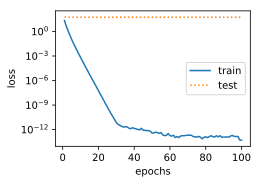

l2 norm of w: 11.611941


In [5]:
fit_and_plot(lambd=0)

### 가중치 감쇠(weight decay) 사용하기

아래 예는 학습 오류는 증가하는 반면, 테스트 오류는 감소하는 것을 보여줍니다. 이것은 가중치 감쇠(weight decay)를 사용하면서 예상한 개선된 결과입니다. 완벽하지는 않지만, 오버피팅(overfitting) 문제가 어느정도 해결되었습니다. 추가로, 가중치  $\mathbf{w}$ 에 대한  $\ell_2$ 놈(norm)도 가중치 감쇠(weight decay)를 사용하지 않을 때보다 작아졌습니다.

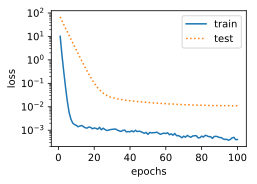

l2 norm of w: 0.041442465


In [6]:
fit_and_plot(lambd=3)

## 간결한 구현

Gluon에는 최적화 알고리즘에 가중치 감쇠(weight decay)가 통합되어 있어 더 편하게 적용할 수 있습니다. 그 이유는 옵티마이져(optimizer)가 모든 파라미터를 직접 다루기 때문에, 옵티마이져(optimizer)가 가중치 감쇠(weight decay)를 직접 관리하고, 관련된 것을 최적화 알고리즘에서 다루는 것이 실행 속도면에서 더 빠르기 때문입니다.

아래 예제에서는 `Trainer`  인스턴스를 생성할 때, `wd` 파라미터를 통해서 가중치 감쇠(weight decay) 하이퍼파라미터(hyperparameter)를 직접 지정합니다. Gluon의 기본 설정은 가중치와 편향(bias)을 모두 감쇠(decay) 시킵니다. 다른 종류의 파라미터에 대해서 다른 옵티마이져(optimizer)를 사용할 수 있습니다. 예를 들면,  $\mathbf{w}$ 에는 가중치 감쇠(weight decay)를 적용하는 `Trainer` 를 하나 만들고,  $b$  에는 가중치 감쇠(weight decay)를 적용하지 않은 다른 `Trainer` 를 각각 만들 수 있습니다.

In [7]:
def fit_and_plot_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    # The weight parameter has been decayed. Weight names generally end with
    # "weight".
    trainer_w = gluon.Trainer(net.collect_params('.*weight'), 'sgd',
                              {'learning_rate': lr, 'wd': wd})
    # The bias parameter has not decayed. Bias names generally end with "bias"
    trainer_b = gluon.Trainer(net.collect_params('.*bias'), 'sgd',
                              {'learning_rate': lr})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            # Call the step function on each of the two Trainer instances to
            # update the weight and bias separately
            trainer_w.step(batch_size)
            trainer_b.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net[0].weight.data().norm().asscalar())

그래프는 가중치 감쇠(weight decay)를 직접 구현해서 얻었던 것과 아주 비슷하게 생겼습니다. 하지만, 더 빠르고 더 구현하기 쉬웠고, 큰 문제의 경우에는 더욱 그렇습니다.

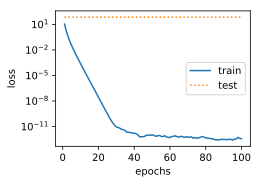

L2 norm of w: 13.311795


In [8]:
fit_and_plot_gluon(0)

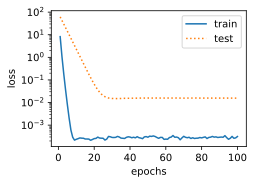

L2 norm of w: 0.032415077


In [9]:
fit_and_plot_gluon(3)

지금까지 우리는 간단한 선형 함수를 구성하는 것들만을 다뤘습니다. 비선형 함수에 대해서 이것들을 다루는 것은 훨씬 더 복잡합니다. 예를 들어,  [Reproducing Kernel Hilbert Spaces](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space) 라는 것이 있는데, 이를 이용하면 선형 함수에서 사용한 많은 도구들을 비선형에서 사용할 수 있게 해줍니다. 하지만 안타깝게도, 사용되는 알고리즘들이 데이터가 매우 많은 경우 잘 동작하지 않는 확장성 문제가 있습니다. 따라서, 이 책의 목적을 위해서 우리는 각 층의 가중치들을 단순히 더하는 방법, $\sum_l \|\mathbf{w}_l\|^2$ 을 사용하겠습니다. 이렇게 하는 것은 전체 층들에 가중치 감쇠(weight decay)를 적용하는 것과 같습니다.

## 요약

* 정규화(regularization)은 오버피팅(overfitting)을 다루는 일반적인 방법입니다. 학습된 모델의 복잡도를 줄이기 위해서 학습 데이터에 대한 손실 함수(loss function)의 값에 패널티 항목을 더합니다.
* 모델을 간단하게 유지하는 방법으로  $\ell_2$ 놈 패널티(norm penalty)를 사용하는 가중치 감쇠(weight decay)를 선택했습니다. 이를 통해서, 학습 알고리즘의 업데이트 단계에서 가중치 감쇠(weight decay)가 적용됩니다.
* Gluon은 옵티마이저(optimizer)에 하이퍼파라미터(hyperparameter) `wd` 를 설정하는 것으로 가중치 감쇠(weight decay) 기능을 자동으로 추가할 수 있습니다.
* 같은 학습에서 파라미터마다 다른 옵티마이저(optimizer)를 적용할 수 있습니다.

## 문제

1. 이 장의 예측 문제에서  $\lambda$ 값을 실험해보세요.  $\lambda$ 에 대한 함수의 형태로 학습 정확도와 테스트 정확도를 도식화해보세요. 어떤 것이 관찰되나요?
1. 검증 데이터셋을 이용해서 최적의 $\lambda$ 값을 찾아보세요. 찾은 값이 진짜 최적값인가요? 진짜 값을 찾는 것이 중요한가요?
1. 패널티 항목으로 $\|\mathbf{w}\|^2$ 대신  $\sum_i |w_i|$ 를 사용하면 업데이트 공식이 어떻게 될까요? (이는  $\ell_1$ 정규화(regularization)라고 합니다.)
1. $\|\mathbf{w}\|^2 = \mathbf{w}^\top \mathbf{w}$ 입니다. 행렬에서 비슷한 공식을 찾아볼 수 있나요? (수학자들은 이를 [Frobenius norm](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm) 이라고 합니다)
1. 학습 오류와 일반화 오류의 관계를 복습해보세요. 가중치 감쇠(weight decay), 학습 데이터셋 늘리기, 적당한 복잡도를 갖는 모델 사용하기 외에, 오버피팅(overfitting)을 다룰 수 있는 방법이 어떤 것들이 있을까요?
1. 베이시안 통계에서,  prior 와  likelihood 곱을 이용해서 posterior를 구할 수 있습니다.  $p(w|x) \propto p(x|w) p(w)$.  $p(w)$ 가 정규화(regularization)와 어떻게 동일할까요?

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2342)

![](../img/qr_weight-decay.svg)